## <font color='darkblue'> ASTR 21100/31200

## <font color='darkblue'> Homework Assignment 3
    
## <font color='darkblue'> Approximating 1D functions using interpolation and regression
 
## <font color='darkblue'> undergraduate students (30 points + 7 extra-credit)
    
### <font color='darkblue'> Distributed: Friday, April 15

### <font color='darkblue'> Due: Friday, Apr 22, 9pm

***Note that you can do exercise 4 instead of 3 or do both 3 and 4 for extra-credit.***


import packages needed by the codes below. Run this cell first before using these codes. 

In [4]:
import numpy as np

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plotting import plot_prettier, plot_line_points

plot_prettier()

## <font color='darkblue'> Exercise 1 (18 points): developing a function for constructing a polynomial or spline approximation of a function of 1 variable $f(x)$ 
    
Notebooks [<tt>05_approximation_class</tt>](https://drive.google.com/file/d/1Pr_Eg9Ieg8Ex6Lv0OnlBfkF6EiLJBUEB/view?usp=sharing) and [<tt>06_spline_class</tt>](https://drive.google.com/file/d/11hGchHotP6aW5Ynp62GJto9Cwa3pA0oR/view?usp=sharing) contain a number of examples of how to do 1) polynomial interpolation, 2) polynomial regression, 3) spline interpolation, 4) spline regression. 

In this exercise your task is to assemble these example into a single "umbrella" function that could be used conveniently to construct any of these approximations. The goal is for your how to use the relevant functions and apply them to construct approximation. 
    
    

**Task 1a. (10 points)** Implement a function that constructs approximation using global polynomial or piecewise spline using input vector of training values and evaluate the approximation at an input set of test values of $x$. 

Below is a suggested format of the function. Examine the docstring (its header) for specifications for how the function should work. 

    def poly_fit(xtr, ftr,  method='polynomial', porder=None, s=0.):
        """
        function constructing an approximating polynomial for the input 
        vector of training values of the approximated function ftr, 
        tabulated at the vector of training points xtr and compute the values
        of constructed polynomial at the input vector of test values xt

        Parameters:
        -----------
        xtr, ftr: numpy arrays
                    vectors of training points and tabulated function values

        method: str
                defining the method to be used in construction of the polynomial
                'polynomial' construct approximating global polynomial 
                      if porder == xtr.size-1 construct interpolating polynomial 
                            using np.linalg.solve
                       if porder < xtr.size construct approximating polynomial 
                              using regression with np.polyfit
                'splint'  - construct interpolating spline using scipy.interpolate.inter1d
                'splreg'  - construct regression spline using scipy.interpolate.UnivariateSpline

        porder: int  - order of the approximating polynomial. 
                    for method='polynomial'  must be 0<=poly_order<=np.size(xtr) 
                               and determines the polynomial order
                    for method='splint' determines order of interpolating spline 
                                 and must be 0, 1, 2, or 3
                                which will correspond to option of interp1d 
                                 kind='zero', 'slinear', 'quadratic', or 'cubic'
                    for method='splreg' this parameter is ignored
        s: smoothing parameter for method='splreg', ignored for other methods 

        Returns:
        --------
        pfit: object that can be called with a vector of test x values to produce approximated function 
               ftest = pfit(xtest)
              (e.g., such object is returned by np.poly1d, np.interp1d, np.polyfit, scipy.interpolate.UnivariateSpline_

        """



**Task 1b. (5 points)** Test this function by constructing interpolating approximations of  $\sin(x)$ over $x\in[0,2\pi]$ using interpolating polynomial and spline and demonstrate that your function  produces expected results using plots of the approximation plotted as line and training points plotted as points (see notebooks above for examples of such plots). 


Test your function by constructing polynomial and spline approximations for the training values of the function given below using regression.  Try different order values and different $s$ values for the polynomial and spline regression. 


***Note:*** If you are familiar with classes, this is the case, where a class PolyFit would be useful instead of a function. So if you want to practice using classes, I encourage you to implement a class with similar capabilities instead of the function. 
If you need guidance with this, it will be provided. 

In [2]:
def ftrain(x, scale=0.5): 
    return 1.5*x + np.sin(x) + np.random.normal(scale=scale, size=np.size(x))


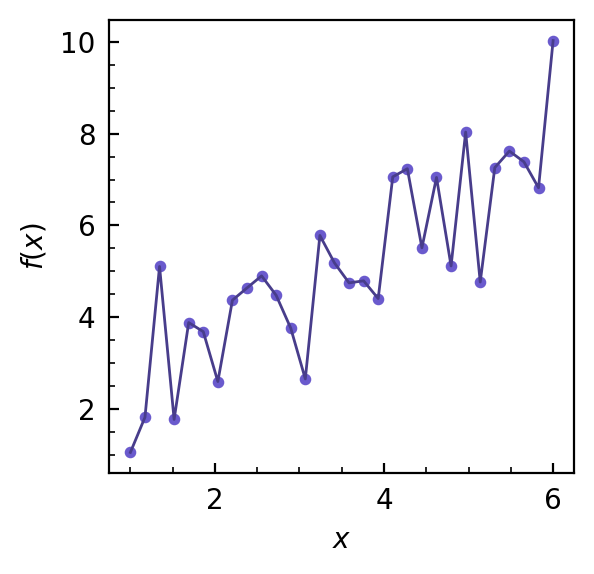

In [5]:
ntr = 30
xtr = np.linspace(1., 6., ntr)
ftr = ftrain(xtr, scale=1.)

plot_line_points(xtr, ftr, xp=xtr, yp=ftr, points=True, psize=40, 
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)

**1c. (3 points)** Spline approximation can be used to get approximate inverse of a function: in other words instead of computing $f$ given $x$, we can compute $x$ given $f$. This works as long as $f$ is monotonic over the range where we construct approximation, because for non-monotonic function there may be $x(f)$ may be multi-valued. 

We can do this by constructing a spline approximation but using $f_{\rm train}$ values as first input to spline function and $x_{\rm train}$ as the second input. Construct such inverse spline approximation for $\arcsin x$ in the interval $x\in [0,\pi/2]$ in which $\sin x$ is monotonic. Test how well the approximation work for several $x$ values in that range and compare it to the value you get from <tt>np.arcsin</tt> function.

### <font color='blue'>Exercise 2: constructing approximation for $d_L$ as a function of $\Omega_\Lambda$  (5 points)</font>

In the notebooks I distributed, I showed that we can obtain an accurate approximation of the distance to an object a given redshift $z$ as a function of $\Omega_{\rm m0}$. Here you will use the function you implemented in exercise 1 and the $d_L$ function you implemented in hw 2 to construct approximation of $d_L$ as a function of the other parameter, $\Omega_\Lambda$, while keeping other values fixed: $z=1$, $\Omega_{\rm m0}=0.3$, $H_0=70$ km/s/Mpc. 

**Task 2a. (3 points)** Use 15 training points of $d_L(\Omega_\Lambda)$ computed using the function you implemented in hw 2 for $\Omega_\Lambda$ in the range $[0,1]$ to construct your approximation. 
Plot training values of as points and approximation using line, similarly to plots in the distributed notebooks used in class. 

**Task 2b. (1 points)** Plot fractional error of the approximation relative to the test values of $d_L$ computed using integration and plot fractional error as a function of $\Omega_\Lambda$, similarly to how this was done in the notebooks I distributed and shown in class. 

**Task 2c (1 points).** Try several different number of training points and replot the fractional error. Briefly discuss how fractional error changes with increasing number of training points. In particular, for what number of training points (approximately) can you reach fractional error smaller than 0.001 (i.e., less than $0.1\%)?

### <font color='blue'>Exercise 3: regression approximation to the correlation of galaxy masses and rotation velocities (known as the Tully-Fisher relation)  (7 points)</font>



**Background.** Galaxies are large collections of gas and stars. Interstellar gas and stars in the "spiral" (aka "disk") galaxies like our Milky Way or [NGC 6384 galaxy](http://astrodvorek.cz/Pics/N6384_1n.jpg) rotates around the center with a velocity that is correlated with the total mass, $M$, of gas and stars in that galaxy. This relation is called the ["Tully-Fisher relation" (TFR)](https://en.wikipedia.org/wiki/Tully%E2%80%93Fisher_relation) in honor of the two astronomers, Brent Tully and Richard Fisher, who discovered it in 1977.   Our Sun, for example, is moving on a nearly circular orbit around the center of the Milky Way with the "***rotation velocity***" of $\approx 220$ km/sec. 

In this exercise you will examine this correlation in the form of logarithms of the mass and logarithm of rotation velocity using modern measurements (from the paper by [Bradford et al. 2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...832...11B/abstract)).
    
The code below reads in measurements $\log_{10} M$ and $v_{\rm rot}$ and prepares them for analysis. The final numbers for regression are put in variables $x=\log_{10} v_{\rm rot}$ and $y=\log_{10} M$  and  their uncertainties (standard deviations), $s_y$ and $s_x$. 

    
**Task** Use your function developed in exercise 1 to construct a smooth approximation of the main trend to the correlation described above using data read and shown below using 1) polynomial and 2) spline regression. 
    
    
* Add your approximation as a line to the plot below showing data with points.     

    
* Try different porder and $s$ parameter values to choose approximation that seems to describe the trend shown by points best. Present your best choice in the final plots. 
    
    
* Include a brief discussion of what you observed when you experimented with order and $s$. 
    

The code below uses AstroPy package, which you need to install, if you don't have it. See [here](https://docs.astropy.org/en/stable/install.html) for installation instructions. 

In [6]:
# this requires installation of AstroPy package
from astropy.io import fits

url = 'http://astro.uchicago.edu/~andrey/classes/a205/data/bradford16_fig1.fits'
b16 = fits.getdata(url)

# width of the HI 21 cm line = proxy for rotation velocity in km/s
vrot = b16['VW20I']; 
# log of Vrot sorted in increasing value
isort = np.argsort(vrot)
x = np.log10(vrot)
# log10 of the gas mass and star mass (aka the "baryons")
y = b16['MBARYON'];
x, y = x[isort], y[isort]

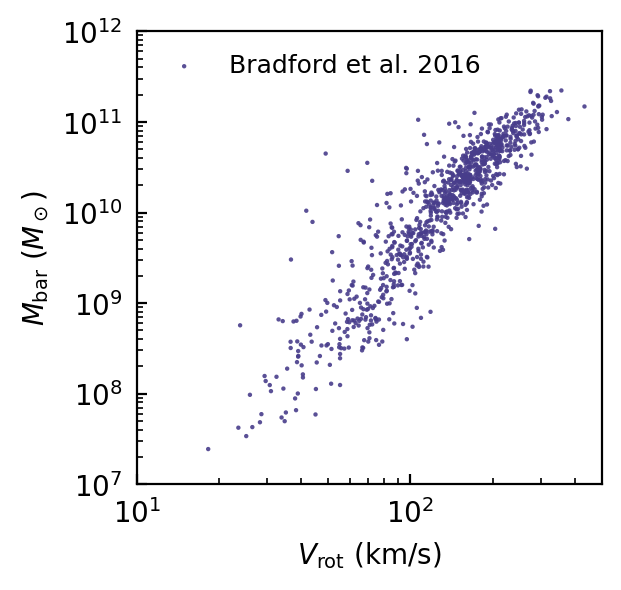

In [8]:
plt.figure(figsize=(3.,3.))
plt.xscale('log'); plt.yscale('log')
plt.xlim([10.,500.]); plt.ylim([1.e7,1.e12]) 
plt.xlabel(r'$V_{\rm rot}\rm\ (km/s)$'); plt.ylabel(r'$M_{\rm bar}\ (M_\odot)$')
plt.scatter(10**x, 10.**y,marker='.',c='darkslateblue',s=10.,alpha=0.9,edgecolor='none', label='Bradford et al. 2016')

plt.legend(frameon=False,loc='upper left', fontsize=9)
plt.show()

### <font color='blue'>Exercise 4. Extra-credit (7 points): Using regression approximation for detrending lightcurves.</font>


***Background.*** Brightness of many astronomical sources varies. In observations apparent (observed) brightness is measured as apparent magnitude $m$ that are related to energy flux in a given wavelength range $f$ as: $m=-2.5\log_{10}f + {\rm const}$, where ${\rm const}$ is a normalizing constant that defines *magnitude system*. 

Change of $m$ as a function of time for a source with a significantly varying brightness is called *lightcurve*. Lightcurves of variable stars is used to learn about physics of interior of these stars. In binary stars, occultations by one star of another which is reflected as a change of brightness of the system, lightcurves can be used to deduce orbital properties of the binary stars. Planets in some exoplanetary systems around some stars that are favorably oriented can block stars of the primary star in the system, which manifests as dips in the lightcurves of such stars. Detections of such dips was one of the main methods of finding exoplanets. 

When lightcurves are measured they are often subject to observational biases induced by instruments and real long-term changes of an object that are not related to the changes on short time scales such as dips. It is often useful or even required to remove such long term trends before searching for changes on short time scales. Such removal is called ***detrending***. 

<img width=600 src="https://github.com/dwkim78/pdtrend/blob/master/pdtrend/datasets/images/PDT_logo.png?raw=true"></img>


In this exercise, you can use the approximation function you implemented in exercise 1 to detrend a lightcurve. 

**Task.** Code below downloads a set of lightcurves from the study of [Kim et al. 2009](https://ui.adsabs.harvard.edu/abs/2009MNRAS.397..558K/abstract). It shows how to select one lightcurve and plot it as a scatter plot (points). 

* Use the approximation function you implemented in exercise 1 to carry out 1) polynomial regression and 2) spline regression of the lightcurve using x and y vectors defined below. Overplot your approximation over points using plt.plot

* Make a separate plot showing detrended flux, defined as original flux - approximation. Make sure that the detrended plot does not show long term trends seen in the original light curves.


Experiment with different orders of polynomial and different $s$ values of the spline and identify the best order and $s$ value that works for detrended 

In [29]:
"""
Base IO code for all datasets

from package pdtrend https://github.com/dwkim78/pdtrend
"""

import sys

from os.path import dirname
from os.path import join


def load_lightcurve_set():
    """
    Return the set of light curves for testing pdtrend.
    Returns
    -------
    lcs : numpy.ndarray
        An array of light curves.
    """

    import bz2
    try:
        import cPickle as pickle
    except:
        import pickle
    import urllib.request

    # The light curves are bzipped and pickled.
    #file_path = 'data/lc.pbz2'
    file_path = 'http://astro.uchicago.edu/~andrey/classes/a211/data/lc.pbz2'
    # For Python 3.
    if sys.version_info.major >= 3:
        #lcs = pickle.load(bz2.BZ2File(file_path, 'r'), encoding='bytes')
        lcs = pickle.load(bz2.BZ2File(urllib.request.urlopen(file_path)), encoding='bytes')

    # For Python 2.
    else:
        lcs = pickle.load(bz2.BZ2File(file_path, 'r'))

    return lcs

In [30]:
# load lightcurves (in arbitrary units)
lcs = load_lightcurve_set()

# generate index of the time variable from 0 to the length of lightcurves
times = np.ones(lcs.shape) * np.arange(lcs.shape[1])

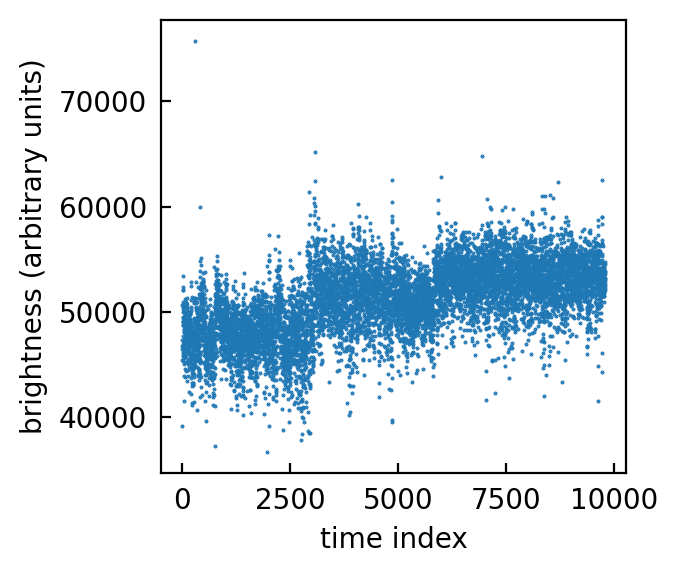

In [33]:
# select lightcurve number ilc (this can be index between 0 and 56)
ilc = 1
x, y = times[ilc], lcs[ilc]

# plot lightcurve as a scatter plot
plt.figure(figsize=(3,3))
plt.xlabel('time index'); plt.ylabel('brightness (arbitrary units)')
plt.scatter(times[1], lcs[1], s=0.2)
plt.show()

You can use x and y defined above for regression. 